<a href="https://colab.research.google.com/github/itsukishindo/IYS_AI_transport/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import xgboost as xgb
from xgboost import XGBRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)
df = df.iloc[:1000]
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

In [2]:

x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']
# sns.pairplot(x)
#split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# print (X_train)
# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

XGBmodel = XGBRegressor()

XGBmodel.fit(X_train, y_train)

y_pred = XGBmodel.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

from sklearn.model_selection import GridSearchCV
param_grid1 = {
     'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
     'n_estimators': [100, 200, 300],
     'max_depth': [3, 4, 5]
}
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator = XGBmodel, param_grid=param_grid1, cv=5, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Mean Absolute Error: 11.79744994044304
Mean Squared Error: 282.9076574759425
R-squared: 0.9886221219040424
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END learning_rat

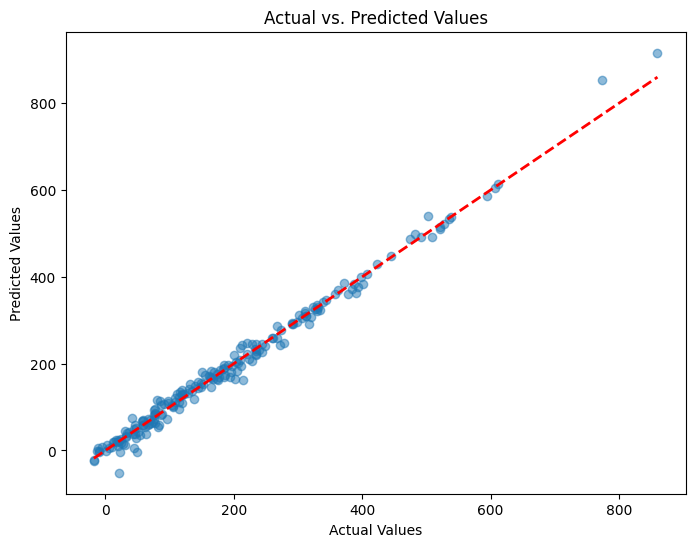

In [3]:
# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()